<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [24]:
import numpy as np, pandas as pd , seaborn as sns, warnings             

import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


In [6]:
import os
print(os.getcwd())
os.chdir(r"C:\Formation")
print(os.getcwd())

C:\Formation
C:\Formation


In [7]:
meteo=pd.read_csv('donnees/tableMeteoMmoyenneJournaliere.csv')
meteo.head()

,T01_01,T01_02,T01_03,T01_04,T01_05,T01_06,T01_07,T01_08,T01_09,T01_10,...,P12_23,P12_24,P12_25,P12_26,P12_27,P12_28,P12_29,P12_30,P12_31,Ville
0,3.93,4.44,3.89,4.27,4.27,4.38,4.96,4.92,4.74,4.21,...,100.93,100.62,100.56,100.68,100.46,100.55,100.73,100.74,100.84,Abbeville
1,9.29,9.81,9.56,9.20,8.83,9.23,9.36,9.38,9.51,9.61,...,101.90,101.79,101.63,101.47,101.55,101.51,101.59,101.75,101.72,Ajaccio
2,4.12,4.41,4.11,4.17,4.34,4.54,4.36,4.83,4.77,4.67,...,100.23,99.93,99.90,99.99,99.72,99.82,99.99,100.03,100.08,Alencon
3,1.90,2.21,1.97,1.76,2.19,1.83,2.48,2.60,2.55,2.14,...,98.86,98.67,98.54,98.60,98.46,98.38,98.67,98.75,98.79,Bale-Mulhouse
4,8.96,9.65,10.37,9.28,9.17,8.99,9.45,9.64,9.49,9.65,...,101.86,101.75,101.52,101.41,101.47,101.36,101.53,101.67,101.72,Bastia


In [8]:
meteo.shape

(42, 1465)

In [9]:
meteo.iloc[:,:-1].head()

,T01_01,T01_02,T01_03,T01_04,T01_05,T01_06,T01_07,T01_08,T01_09,T01_10,...,P12_22,P12_23,P12_24,P12_25,P12_26,P12_27,P12_28,P12_29,P12_30,P12_31
0,3.93,4.44,3.89,4.27,4.27,4.38,4.96,4.92,4.74,4.21,...,101.00,100.93,100.62,100.56,100.68,100.46,100.55,100.73,100.74,100.84
1,9.29,9.81,9.56,9.20,8.83,9.23,9.36,9.38,9.51,9.61,...,101.95,101.90,101.79,101.63,101.47,101.55,101.51,101.59,101.75,101.72
2,4.12,4.41,4.11,4.17,4.34,4.54,4.36,4.83,4.77,4.67,...,100.28,100.23,99.93,99.90,99.99,99.72,99.82,99.99,100.03,100.08
3,1.90,2.21,1.97,1.76,2.19,1.83,2.48,2.60,2.55,2.14,...,98.93,98.86,98.67,98.54,98.60,98.46,98.38,98.67,98.75,98.79
4,8.96,9.65,10.37,9.28,9.17,8.99,9.45,9.64,9.49,9.65,...,101.93,101.86,101.75,101.52,101.41,101.47,101.36,101.53,101.67,101.72


In [10]:
meteo.shape

(42, 1465)

In [11]:
x = meteo.drop(columns='Ville')
ville = meteo.Ville

from sklearn.preprocessing import StandardScaler
modelStd = StandardScaler()
modelStd.fit(x)
x = modelStd.transform(x)

In [12]:
x.shape

(42, 1464)

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
model = pca.fit(x)

In [14]:
pca.explained_variance_ratio_.shape[0]

42

In [15]:
pca.explained_variance_ratio_.cumsum()*100

array([ 41.40081945,  71.18566721,  88.68214136,  93.73910026,
        95.56286784,  96.2323207 ,  96.86435278,  97.31073195,
        97.732439  ,  98.02741604,  98.28201539,  98.49710625,
        98.70243132,  98.86107137,  98.99153831,  99.09105348,
        99.18914938,  99.27073267,  99.34245307,  99.41131138,
        99.47308374,  99.52319672,  99.57106929,  99.61534029,
        99.6586036 ,  99.69628792,  99.73182471,  99.76508492,
        99.79352904,  99.81987379,  99.84424159,  99.86757463,
        99.88835161,  99.90689234,  99.9244709 ,  99.94122166,
        99.95707229,  99.96961109,  99.98137249,  99.99133326,
       100.        , 100.        ])

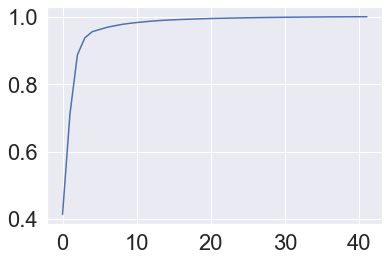

In [25]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [17]:
sum(pca.explained_variance_ratio_.cumsum() < .95) + 1

5

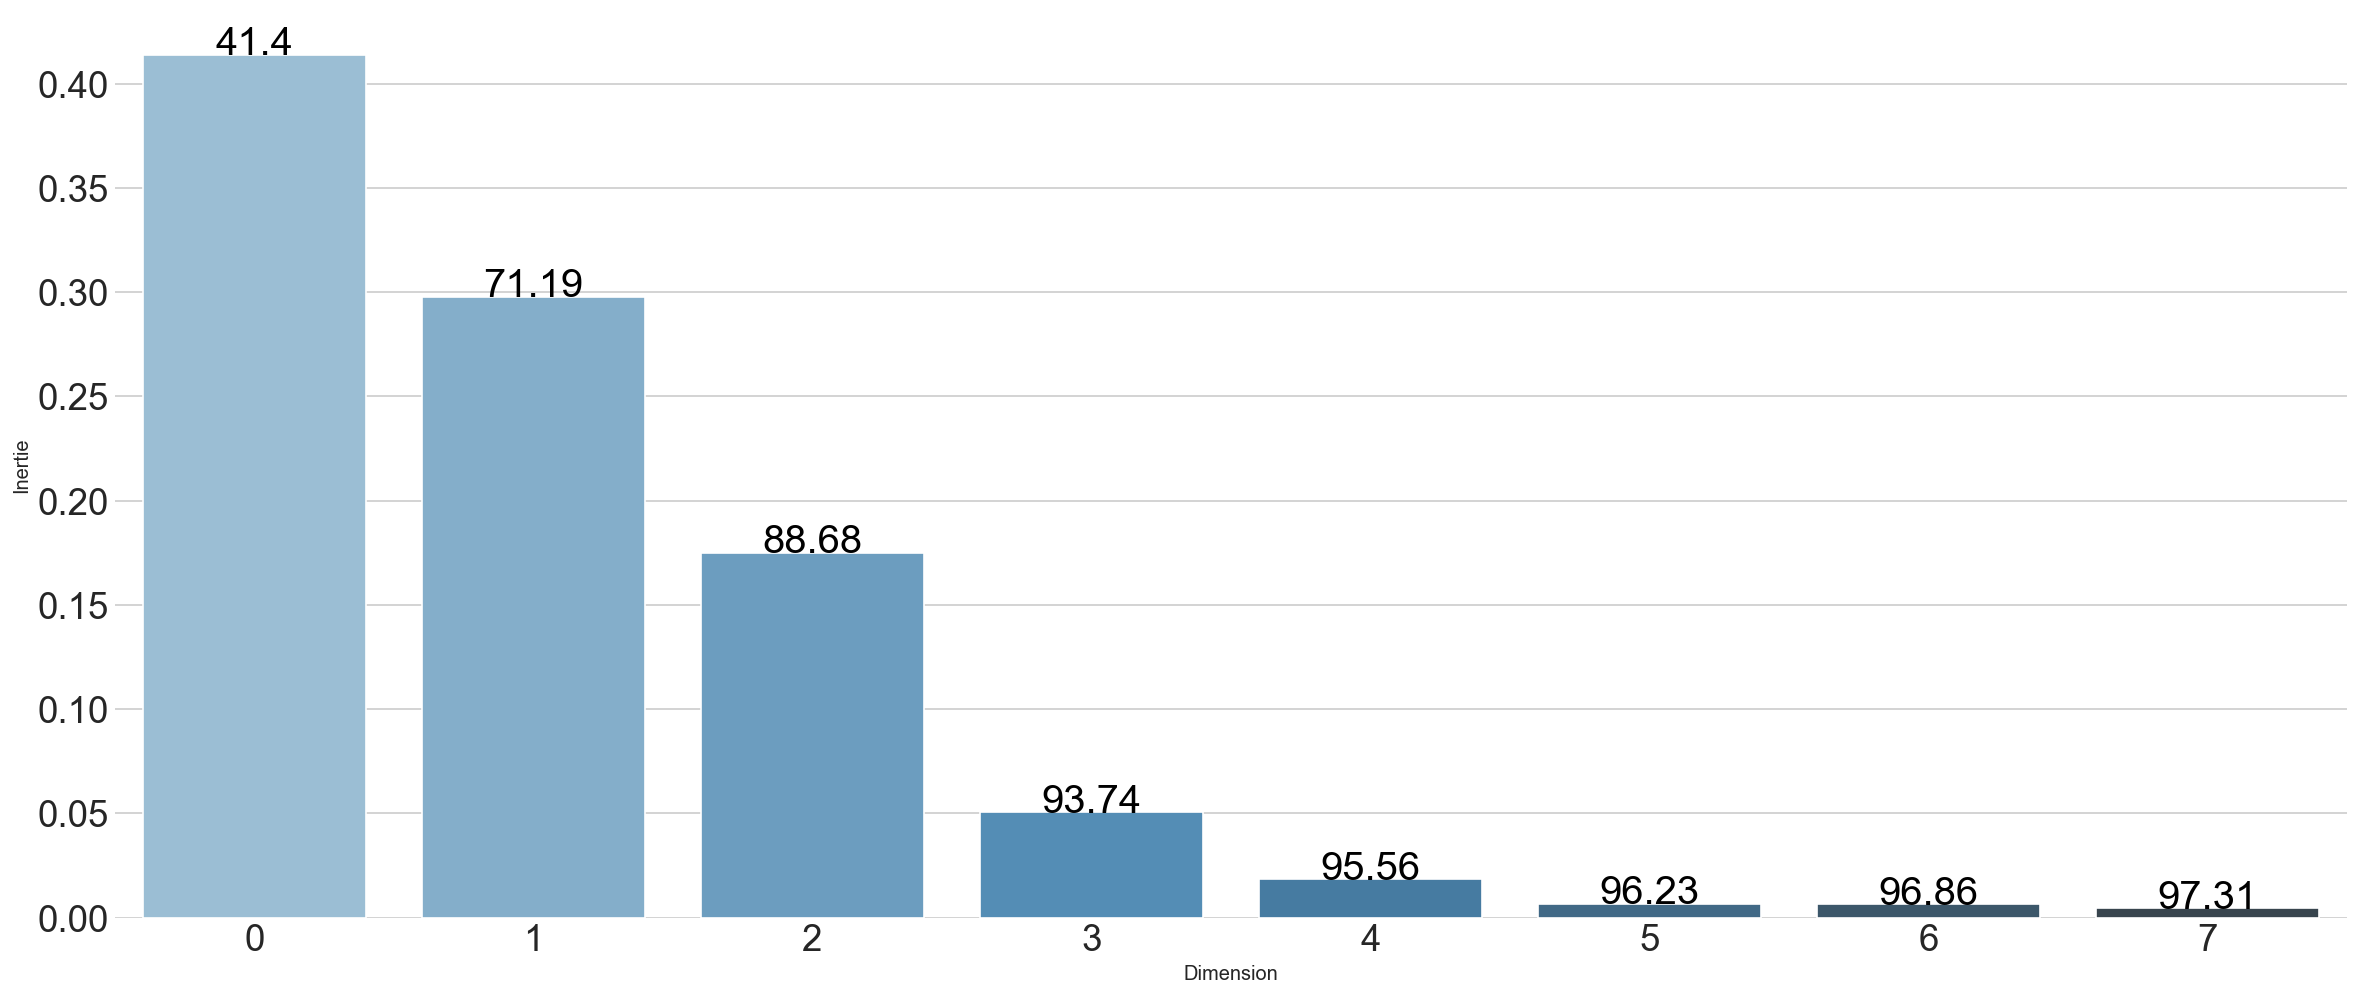

In [35]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=12)

inertie = pd.DataFrame(pca.explained_variance_ratio_,columns=['Inertie']) 
inertie['label'] = np.round(pca.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(0,pca.explained_variance_ratio_.shape[0])


ndim = 8
plt.figure(figsize=(24,10),dpi=120)
sns.set_style("whitegrid")
g = sns.barplot(x="Dimension",y='Inertie', 
                data=inertie.iloc[:ndim,:], 
                palette="Blues_d")
for index, row in inertie.iloc[:ndim,:].iterrows():
    g.text(row.name,row.Inertie, 
           row.label, 
           color='black', ha="center", rotation=0)
    
plt.xlabel('Dimension', fontproperties=font1)
plt.ylabel('Inertie', fontproperties=font1)
sns.set(font_scale=2)
plt.style.use('seaborn-darkgrid')
plt.show()

In [29]:
n_components = sum(pca.explained_variance_ratio_.cumsum() < .95 ) + 1 
from sklearn.decomposition import PCA
modelPCA = PCA(n_components=n_components)
modelPCA.fit(x)

PCA(n_components=5)

In [20]:
n_components

5

In [21]:
dfPCA = pd.DataFrame(data=modelPCA.transform(x),
                  columns=['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5'])
dfPCA['Ville']= meteo.Ville
dfPCA.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Ville
0,-5.143093,-28.263275,1.113159,-2.807859,-4.222921,Abbeville
1,-22.953399,21.026096,-13.316346,12.705632,4.231791,Ajaccio
2,7.794759,-17.610817,-9.316877,-2.148869,0.291873,Alencon
3,26.889062,-5.185913,-13.213791,-1.976655,-3.830246,Bale-Mulhouse
4,-19.684191,28.870433,-18.568462,16.774423,0.338931,Bastia


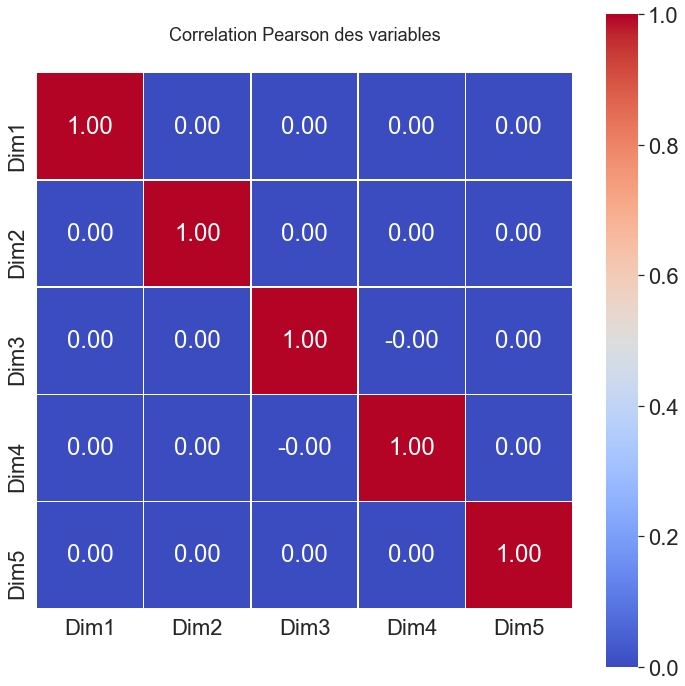

In [32]:
plt.figure(figsize=(12,12))
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(dfPCA.corr(),linewidths=0.3,vmax=1.0, fmt= '.2f', 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

<Figure size 432x288 with 0 Axes>

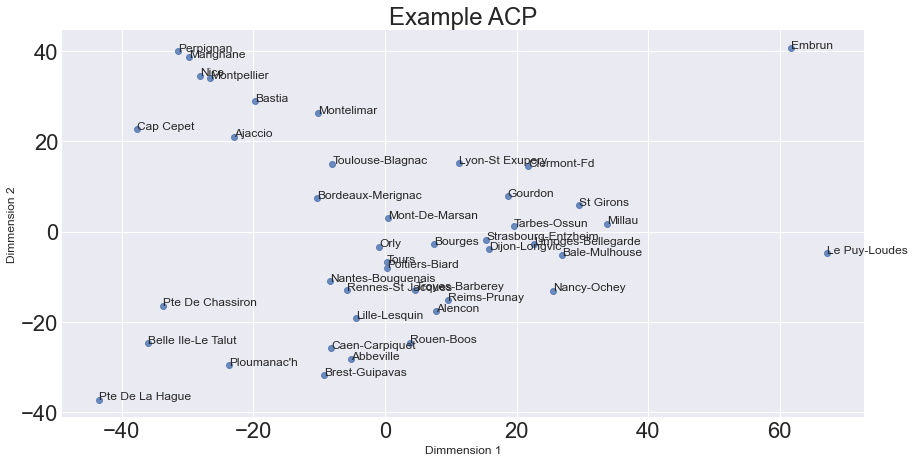

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.figure()

ax = sns.lmplot(x='Dim1',y='Dim2', data=dfPCA, 
                fit_reg=False, size = 6, aspect =2 ) 

plt.title('Example ACP', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), fontproperties=font1)

label_point(dfPCA.Dim1, dfPCA.Dim2, dfPCA.Ville, plt.gca())

In [39]:
import plotly.express as px
fig = px.scatter_3d(dfPCA, 
                    x='Dim1', 
                    y='Dim2', 
                    z='Dim3',
                    #color='Zone',
                    #size=100+donneesT.CD5*500,
                    #symbol='CD23',
                    text='Ville', 
                    width=900,
                    height=1024,
                   )

fig.show()

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(dfPCA.drop(columns='Ville'))
dfPCA['Km3'] = y_kmeans
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(dfPCA.drop(columns='Ville'))
dfPCA['Km4'] = y_kmeans

In [47]:
import plotly.express as px
fig = px.scatter_3d(dfPCA, 
                    x='Dim1', 
                    y='Dim2', 
                    z='Dim3',
                    color='Km3',
                    #size=100+donneesT.CD5*500,
                    #symbol='CD23',
                    text='Ville', 
                    width=900,
                    height=1024,
                   )

fig.show()

In [48]:
import plotly.express as px
fig = px.scatter_3d(dfPCA, 
                    x='Dim1', 
                    y='Dim2', 
                    z='Dim3',
                    color='Km4',
                    #size=100+donneesT.CD5*500,
                    #symbol='CD23',
                    text='Ville', 
                    width=900,
                    height=1024,
                   )

fig.show()